In [1]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2024-10-16 22:22:52.424081: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 22:22:52.427949: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 22:22:52.439441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 22:22:52.458567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 22:22:52.464025: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 22:22:52.477987: I tensorflow/core/platform/cpu_feature_gu

# Data

In [2]:
def target_func(x):
    m = 30
    y = (1 - x**2/2) * np.cos(m* (x + x**3/2))

    return y

(-1.0, 1.0)

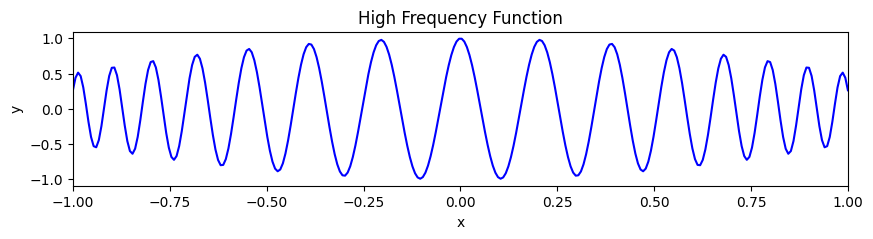

In [3]:
x = np.linspace(-1, 1, 300)
y = target_func(x)

plt.figure(figsize=(10,2))
plt.plot(x, y, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("High Frequency Function")
plt.xlim([-1, 1])

## Train Test Split

x_train shape:  (240,) y_train shape:  (240,)
x_test shape:  (60,) y_test shape (60,)


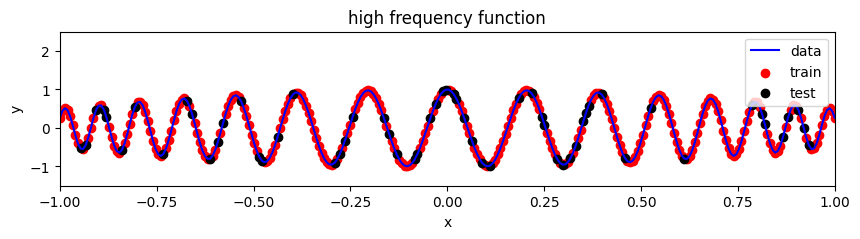

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("x_train shape: ", x_train.shape, "y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape, "y_test shape", y_test.shape)

plt.figure(figsize=(10,2))
plt.plot(x, y, color="blue", label="data")
plt.scatter(x_train, y_train, color="red", label="train")
plt.scatter(x_test, y_test, color="black", label="test")
plt.xlabel("x")
plt.ylabel("y")
plt.title("high frequency function")
plt.xlim([-1, 1])
plt.ylim([-1.5, 2.5])
plt.legend(loc="best")

# Neural Network

## Model

### Hyperbolic Tangent Activation Function

In [5]:
from keras.models import Sequential
from keras.initializers import GlorotNormal
from keras.layers import Input, Dense, Lambda

# model 1:
model1 = Sequential()

# input layer:
model1.add(Input((1,)))
# dense 1:
model1.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# dense 2:
model1.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# dense 2:
model1.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# output layer:
model1.add(Dense(units=1, activation="linear", kernel_initializer=GlorotNormal()))

model1.summary()

I0000 00:00:1729104777.319781  715417 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-16 22:22:57.320435: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,951 (7.62 KB)

 Trainable params: 1,951 (7.62 KB)

 Non-trainable params: 0 (0.00 B)

### Scale Factor

In [6]:
# model 2:
model2 = Sequential()

# scale factor:
scale_factor = 35
# input layer:
model2.add(Lambda(lambda x: x * scale_factor, input_shape=(1,)))
# dense 1:
model2.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# dense 2:
model2.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# dense 2:
model2.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# output layer:
model2.add(Dense(units=1, activation="linear", kernel_initializer=GlorotNormal()))

model2.summary()

/home/ebi/miniforge3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,951 (7.62 KB)

 Trainable params: 1,951 (7.62 KB)

 Non-trainable params: 0 (0.00 B)

### Periodic Activation Function

In [7]:
# model 3:
model3 = Sequential()

# sinusoidal activation function:
def sine_activation(x):
    return tf.sin(x)
    
# input layer:
model3.add(Input((1,)))
# dense 1:
model3.add(Dense(units=30, activation=sine_activation, kernel_initializer=GlorotNormal()))
# dense 2:
model3.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# dense 2:
model3.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# output layer:
model3.add(Dense(units=1, activation="linear", kernel_initializer=GlorotNormal()))

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,951 (7.62 KB)

 Trainable params: 1,951 (7.62 KB)

 Non-trainable params: 0 (0.00 B)

### Periodic Activation Function & Scale Factor

In [8]:
# model 4:
model4 = Sequential()
    
# input layer:
model4.add(Lambda(lambda x: x*scale_factor, input_shape=(1,)))
# dense 1:
model4.add(Dense(units=30, activation=sine_activation, kernel_initializer=GlorotNormal()))
# dense 2:
model4.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# dense 2:
model4.add(Dense(units=30, activation="tanh", kernel_initializer=GlorotNormal()))
# output layer:
model4.add(Dense(units=1, activation="linear", kernel_initializer=GlorotNormal()))

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,951 (7.62 KB)

 Trainable params: 1,951 (7.62 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation

### Hyperbolic Tangent Activation Function

In [9]:
loss = tf.losses.MeanSquaredError()
optimizer = tf.optimizers.Adam()

model1.compile(loss=loss, optimizer=optimizer)

history1 = model1.fit(x_train, y_train, validation_split=0.1, epochs=3000, batch_size=50, verbose=0)

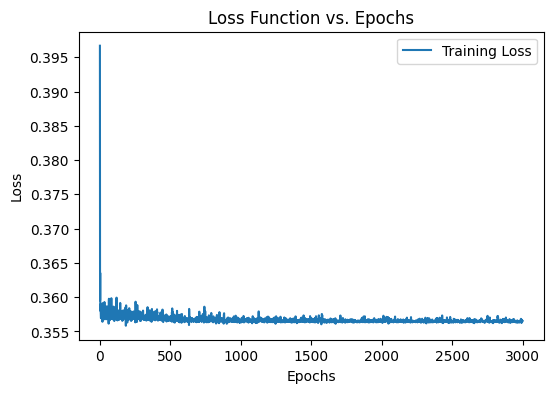

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(history1.history['loss'], label='Training Loss')
plt.title('Loss Function vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Scale Factor

In [11]:
loss = tf.losses.MeanSquaredError()
optimizer = tf.optimizers.Adam()

model2.compile(loss=loss, optimizer=optimizer)

history2 = model2.fit(x_train, y_train, validation_split=0.1, epochs=3000, batch_size=50, verbose=0)

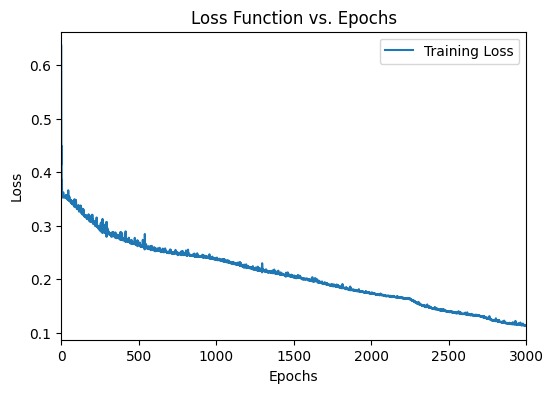

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(history2.history['loss'], label='Training Loss')
plt.title('Loss Function vs. Epochs')
plt.xlim([0, 3000])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Periodic Activation Function

In [13]:
loss = tf.losses.MeanSquaredError()
optimizer = tf.optimizers.Adam()

model3.compile(loss=loss, optimizer=optimizer)

history3 = model3.fit(x_train, y_train, validation_split=0.1, epochs=3000, batch_size=50, verbose=0)

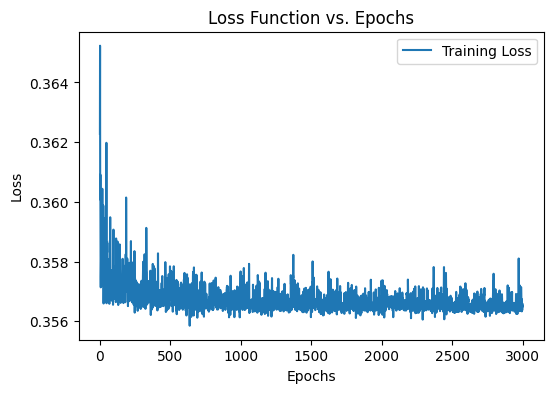

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(history3.history['loss'], label='Training Loss')
plt.title('Loss Function vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Periodic Activation Function & Scale Factor

In [15]:
loss = tf.losses.MeanSquaredError()
optimizer = tf.optimizers.Adam()

model4.compile(loss=loss, optimizer=optimizer)

history4 = model4.fit(x_train, y_train, validation_split=0.1, epochs=3000, batch_size=50, verbose=0)

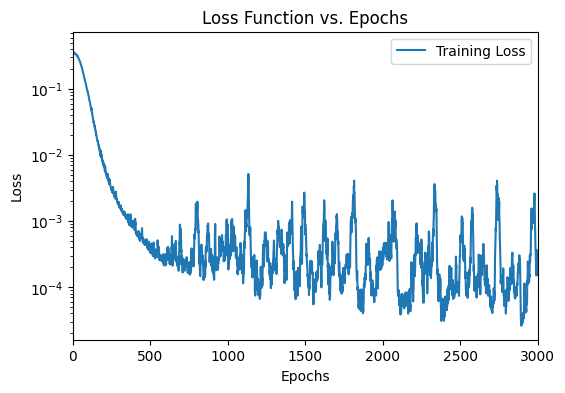

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(history4.history['loss'], label='Training Loss')
plt.title('Loss Function vs. Epochs')
plt.xlim([0, 3000])
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Comparison of Models

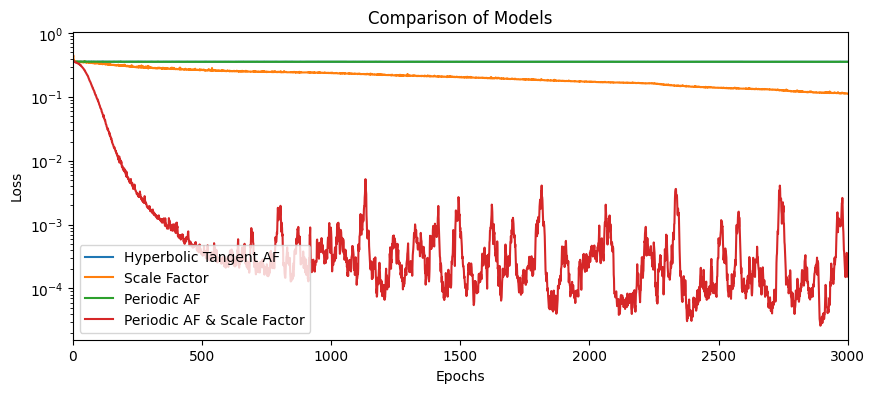

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(history1.history['loss'], label='Hyperbolic Tangent AF')
plt.plot(history2.history['loss'], label='Scale Factor')
plt.plot(history3.history['loss'], label='Periodic AF')
plt.plot(history4.history['loss'], label='Periodic AF & Scale Factor')
plt.title('Comparison of Models')
plt.xlim([0, 3000])
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="lower left")

## Evaluation

### Hyperbolic Tangent Activation Function

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


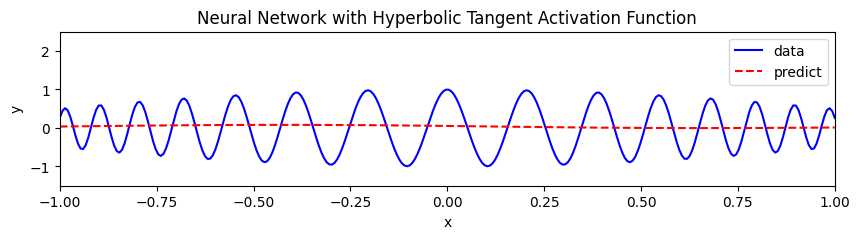

In [18]:
y_predict = model1.predict(x)

plt.figure(figsize=(10,2))
plt.plot(x, y, color="blue", label="data")
plt.plot(x, y_predict, color="red", linestyle="--", label="predict")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural Network with Hyperbolic Tangent Activation Function")
plt.xlim([-1, 1])
plt.ylim([-1.5, 2.5])
plt.legend(loc="best")

### Scale Factor

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


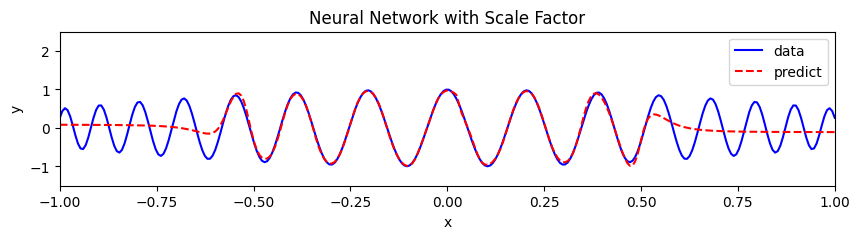

In [19]:
y_predict = model2.predict(x)

plt.figure(figsize=(10,2))
plt.plot(x, y, color="blue", label="data")
plt.plot(x, y_predict, color="red", linestyle="--", label="predict")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural Network with Scale Factor")
plt.xlim([-1, 1])
plt.ylim([-1.5, 2.5])
plt.legend(loc="best")

### Periodic Activation Function

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


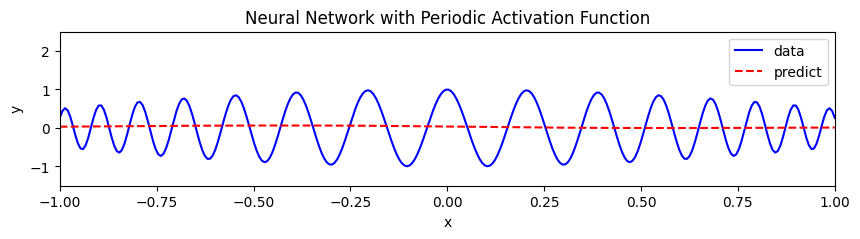

In [20]:
y_predict = model3.predict(x)

plt.figure(figsize=(10,2))
plt.plot(x, y, color="blue", label="data")
plt.plot(x, y_predict, color="red", linestyle="--", label="predict")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural Network with Periodic Activation Function")
plt.xlim([-1, 1])
plt.ylim([-1.5, 2.5])
plt.legend(loc="best")

### Periodic Activation Function & Scale Factor

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


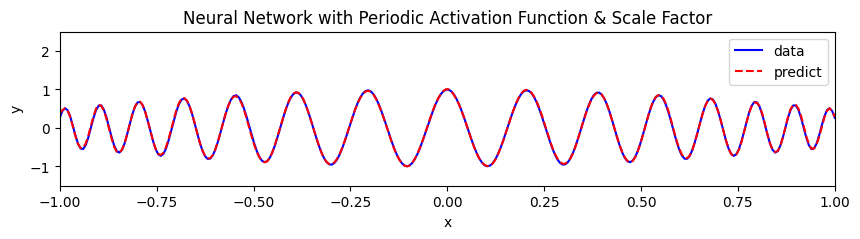

In [21]:
y_predict = model4.predict(x)

plt.figure(figsize=(10,2))
plt.plot(x, y, color="blue", label="data")
plt.plot(x, y_predict, color="red", linestyle="--", label="predict")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural Network with Periodic Activation Function & Scale Factor")
plt.xlim([-1, 1])
plt.ylim([-1.5, 2.5])
plt.legend(loc="best")